# Implementação de multi-layer perceptron

# Importações

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

# Problema da porta lógica XOR

## Configurando o dataset

In [8]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

## Configurando o MLP

In [9]:
# Creating the MLP model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))  # First hidden layer
model.add(Dense(1, activation='sigmoid'))            # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Treinando e vendo os resultados

In [10]:
# Train the model
model.fit(x, y, epochs=10, batch_size=1)

Epoch 1/10


4/4 [==============================] - 1s 3ms/step - loss: 0.7076 - accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5000


# MNIST

## Carregando o dataset

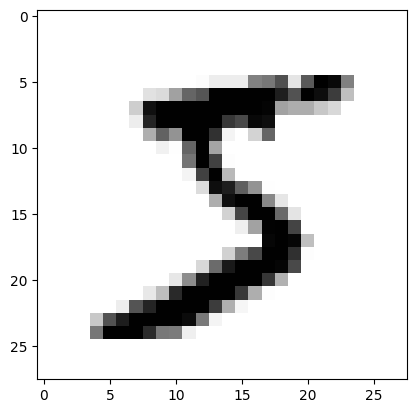

(28, 28)

In [11]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

# x_train[0]
x_train[0].shape

## Configurando o MLP

In [12]:
model3 = tf.keras.models.Sequential()  # a basic feed-forward model
model3.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model3.add(tf.keras.layers.Dense(128, input_dim=784, activation="relu"))  # a simple fully-connected layer, 128 units, relu activation
model3.add(tf.keras.layers.Dense(128, activation="relu"))  # a simple fully-connected layer, 128 units, relu activation
model3.add(tf.keras.layers.Dense(10, activation="softmax"))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model3.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

## Treinando

In [13]:
model3.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6529 - accuracy: 0.8789
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3587 - accuracy: 0.9275
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2403 - accuracy: 0.9426


## Testando o resultado

In [14]:
predictions = model3.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [15]:
import numpy as np

print(np.argmax(predictions[0]))

7


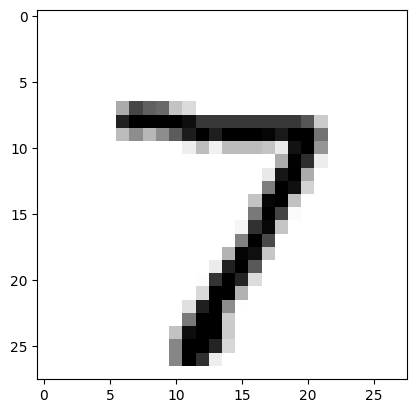

In [16]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

# MNIST c/ Conv. Net

## Configurando a rede neural

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Primeira camada convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    # Segunda camada convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Terceira camada convolucional
    Conv2D(64, (3, 3), activation='relu'),

    # Achatar o output para DNN
    Flatten(),

    # Camada densa
    Dense(64, activation='relu'),

    # Dropout
    Dropout(0.5),

    # Camada de saída
    Dense(10, activation='softmax')
])

# Sumário do modelo
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

## Treinando



In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=32)


Epoch 1/3
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5372 - accuracy: 0.8437 - val_loss: 0.0862 - val_accuracy: 0.9756
Epoch 2/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1521 - accuracy: 0.9576 - val_loss: 0.0735 - val_accuracy: 0.9793
Epoch 3/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1034 - accuracy: 0.9716 - val_loss: 0.0639 - val_accuracy: 0.9851


## Verificando o resultado

In [19]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0592 - accuracy: 0.9860
Test accuracy: 0.9860000014305115


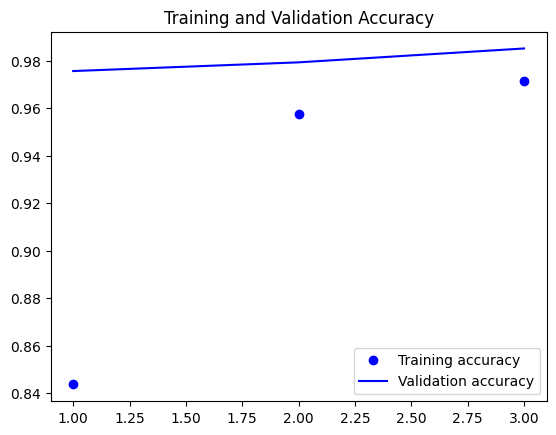

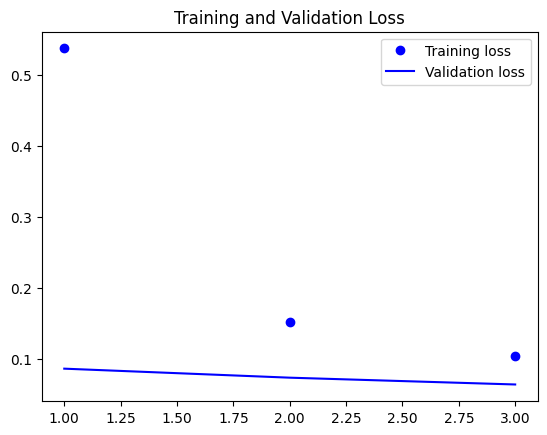

In [20]:
import matplotlib.pyplot as plt

# Precisão e perda ao longo das épocas
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Precisão
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

# Perda
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()